
## Analyzing Correlation between the Atlantic Multidecadal Oscillation and ERA5 monthly averaged precip anomalies over Africa

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from clim680_function import xyticks

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [3]:
#Climate index of choice: Atlantic Multidecadal Oscillation (AMO)
path='/homes/areed29/CLIM680_Fall2021/CLIM_INDICES/'
file='amon.us.data'
index_name='amo'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,na_values=['-99.99','-99.990'])
df.drop(df.tail(5).index,inplace=True)


In [4]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1948-1-01


In [5]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [6]:
clim_index=df.T.unstack().values
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='amo')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    amo      (time) object '-0.019' '-0.031' '0.024' ... 0.297 0.12 0.17

<xarray.Dataset>
Dimensions:  (time: 501)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
Data variables:
    amo      (time) object '-0.200' '-0.159' '-0.236' ... '0.349' 0.433 0.304
<xarray.DataArray 'amo' (time: 501)>
array([-0.2  , -0.159, -0.236, -0.245, -0.125, -0.05 , -0.102, -0.123,
       -0.117, -0.095, -0.093, -0.067, -0.009, -0.086, -0.146, -0.008,
        0.122,  0.101,  0.043,  0.016, -0.015, -0.069, -0.204, -0.257,
       -0.184, -0.183, -0.002, -0.098, -0.087, -0.065, -0.097, -0.118,
       -0.039, -0.189, -0.14 , -0.009, -0.084, -0.081, -0.083, -0.185,
       -0.194, -0.187, -0.231, -0.311, -0.31 , -0.374, -0.42 , -0.383,
       -0.301, -0.107,  0.078,  0.056, -0.051, -0.057, -0.018, -0.161,
       -0.218, -0.198, -0.161, -0.006, -0.109, -0.091, -0.128, -0.16 ,
       -0.169, -0.327, -0.269, -0.229, -0.212, -0.347, -0.427, -0.321,
       -0.358, -0.332, -0.359, -0.404, -0.34 , -0.131, -0.156, -0.285,
       -0.251, -0.248, -0.298, -

Text(0.5, 0.98, 'Atlantic Multidecadal Oscillation')

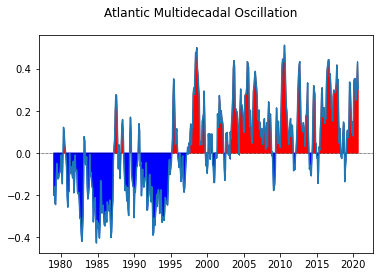

In [7]:
sliced_amo=ds_index.sel(time=slice(ds_index['time'][372],ds_index['time'][-4]))
print(sliced_amo)
#Warm AMO- above 0
#Cold AMO-below 0
amo_values = sliced_amo.amo
#print(nao_values)
amo_float = amo_values.astype(float)
print(amo_float)
warm_amo=amo_float.where(amo_float>0.0)
cold_amo = amo_float.where(amo_float<0.0)
plt.fill_between(amo_float['time'],0,warm_amo,color='red')
plt.fill_between(amo_float['time'],cold_amo, 0,color='blue')
plt.axhline(0,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(0,color='black',linewidth=0.5,linestyle='dotted')
plt.plot(amo_float['time'],amo_float)
plt.suptitle('Atlantic Multidecadal Oscillation')
#plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/AMO_defined')

### Next, use a linear regression to de-trend the time series

In [8]:
from scipy.stats import linregress

In [10]:
x_values = np.linspace(0,1,len(amo_float['time'])) #create evenly spaced x array to match number of months
#print(x_values)

In [11]:
slope, intercept, r_value, p_value, std_err = linregress(x_values,amo_float)
slope,intercept,r_value,p_value,std_err

(0.45385571486509046,
 -0.19794582150440154,
 0.6341302447841398,
 1.033242244377317e-57,
 0.024773972843009695)

-0.19794582150440154 0.4538557148650906


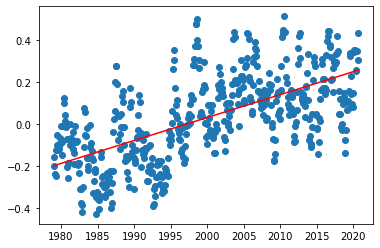

In [12]:
[m_fit,b_fit]=np.polyfit(x_values,amo_float,1)
print(b_fit,m_fit)
y_fit = m_fit*x_values+b_fit #fit a line to the time series
plt.scatter(amo_float['time'],amo_float) #plots the time series as a scatter plot
plt.plot(amo_float['time'],y_fit,'r-') #plots the line

In [13]:
# Now, de-trend the data
amo_detrended = amo_float - y_fit
print(amo_detrended)

<xarray.DataArray 'amo' (time: 501)>
array([-2.05417850e-03,  3.80381101e-02, -3.98696014e-02, -4.97773128e-02,
        6.93149758e-02,  1.43407264e-01,  9.04995529e-02,  6.85918415e-02,
        7.36841301e-02,  9.47764186e-02,  9.58687072e-02,  1.20960996e-01,
        1.78053284e-01,  1.00145573e-01,  3.92378615e-02,  1.76330150e-01,
        3.05422439e-01,  2.83514727e-01,  2.24607016e-01,  1.96699304e-01,
        1.64791593e-01,  1.09883881e-01, -2.60238299e-02, -7.99315414e-02,
       -7.83925281e-03, -7.74696424e-03,  1.72345324e-01,  7.54376129e-02,
        8.55299015e-02,  1.06622190e-01,  7.37144786e-02,  5.18067672e-02,
        1.29899056e-01, -2.10086557e-02,  2.70836329e-02,  1.57175921e-01,
        8.12682100e-02,  8.33604986e-02,  8.04527872e-02, -2.24549243e-02,
       -3.23626357e-02, -2.62703471e-02, -7.11780585e-02, -1.52085770e-01,
       -1.51993481e-01, -2.16901193e-01, -2.63808904e-01, -2.27716616e-01,
       -1.46624327e-01,  4.64679614e-02,  2.30560250e-01,  2.07

Text(0.5, 0.98, 'Atlantic Multidecadal Oscillation')

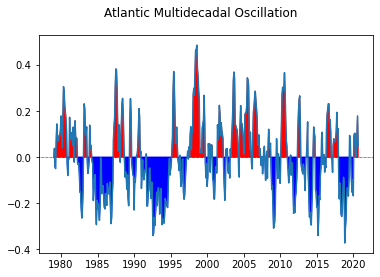

In [14]:
warm_amo=amo_detrended.where(amo_detrended>0.0)
cold_amo = amo_detrended.where(amo_detrended<0.0)
plt.fill_between(amo_detrended['time'],0,warm_amo,color='red')
plt.fill_between(amo_detrended['time'],cold_amo, 0,color='blue')
plt.axhline(0,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(0,color='black',linewidth=0.5,linestyle='dotted')
plt.plot(amo_detrended['time'],amo_detrended)
plt.suptitle('Atlantic Multidecadal Oscillation')
#plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/AMO_defined')

<xarray.Dataset>
Dimensions:  (time: 501)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
Data variables:
    amo      (time) object '-0.197' '-0.156' '-0.233' ... '0.354' 0.438 0.309
<xarray.DataArray 'amo' (time: 501)>
array([-0.197, -0.156, -0.233, -0.242, -0.122, -0.046, -0.099, -0.119,
       -0.114, -0.092, -0.089, -0.064, -0.006, -0.082, -0.143, -0.005,
        0.125,  0.105,  0.046,  0.019, -0.012, -0.065, -0.201, -0.253,
       -0.181, -0.18 ,  0.002, -0.094, -0.083, -0.061, -0.094, -0.114,
       -0.035, -0.186, -0.136, -0.006, -0.08 , -0.078, -0.08 , -0.182,
       -0.191, -0.183, -0.228, -0.308, -0.307, -0.37 , -0.416, -0.379,
       -0.297, -0.103,  0.082,  0.06 , -0.047, -0.053, -0.014, -0.157,
       -0.215, -0.195, -0.157, -0.002, -0.106, -0.087, -0.124, -0.157,
       -0.165, -0.324, -0.265, -0.225, -0.208, -0.343, -0.424, -0.317,
       -0.354, -0.329, -0.356, -0.4  , -0.337, -0.128, -0.153, -0.281,
       -0.247, -0.245, -0.295, -

Text(0.5, 0.98, 'Atlantic Multidecadal Oscillation')

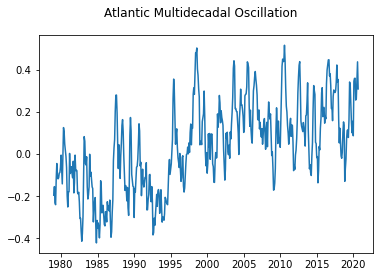

In [25]:
#Slice array to be consistent with precip data
sliced_amo=ds_index.sel(time=slice(ds_index['time'][372],ds_index['time'][-4]))
print(sliced_amo)
#Warm AMO- above 0
#Cold AMO-below 0
amo_values = sliced_amo.amo
#print(nao_values)
amo_float = amo_values.astype(float)
print(amo_float)
warm_amo=amo_float.where(amo_float>0.0)
cold_amo = amo_float.where(amo_float<0.0)
plt.plot(amo_float['time'],amo_float)
plt.suptitle('Atlantic Multidecadal Oscillation')
#plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/AMO_defined')

### Next, read in the ERA5 monthly averaged precipitation data

In [26]:
f= '/scratch/areed29/ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
dataset =DS1.mean(dim='expver')
data_lat= DS1.latitude #latitudes
data_lon= DS1.longitude #longitudes
precip = dataset.tp
prec_water=dataset.tcwv
clouds = dataset.tcc

In [27]:
precip=precip.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
print(precip)
clouds=clouds.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
prec_water=prec_water.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))

<xarray.DataArray 'tp' (time: 501, latitude: 401, longitude: 241)>
dask.array<getitem, shape=(501, 401, 241), dtype=float32, chunksize=(501, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01


In [28]:
# Mask out only land values for data, then calculate the climatology
ds_mean = DS1.mean('expver')
mask = ds_mean.lsm #loads in land-sea mask
land_ds_precip = precip.where(mask>0.5)
land_ds_clouds = clouds.where(mask>0.5)
land_ds_prec_water= prec_water.where(mask>0.5)
ds_climo_precip = land_ds_precip.groupby('time.month').mean()
ds_climo_clouds = land_ds_clouds.groupby('time.month').mean()
ds_climo_tcwv = land_ds_prec_water.groupby('time.month').mean()
#Now calculate land anomalies
ds_anoms_precip = land_ds_precip.groupby('time.month')-ds_climo_precip
ds_anoms_clouds = land_ds_clouds.groupby('time.month')-ds_climo_clouds
ds_anoms_tcwv = land_ds_prec_water.groupby('time.month')-ds_climo_tcwv

In [29]:
#Also included are calculations for nonmasking (domain includes water in addition to land)
precip_climo_nonmasked = precip.groupby('time.month').mean()
precip_anoms_nonmasked = precip.groupby('time.month')-precip_climo_nonmasked
precip_nonmasked_std = precip_anoms_nonmasked.std()
precip_nonmasked_norm = precip_anoms_nonmasked/precip_nonmasked_std
point_nonmasked_precip = precip_nonmasked_norm.sel(latitude=15,longitude=10,method='nearest')

### Normalization of Anomalies

In [30]:
precip_std = ds_anoms_precip.std()
clouds_std = ds_anoms_clouds.std()
tcwv_std = ds_anoms_tcwv.std()
tp_norm=ds_anoms_precip/precip_std
clouds_norm = ds_anoms_clouds/clouds_std
tcwv_norm = ds_anoms_tcwv/tcwv_std
#print(tp_norm)
tp_norm_nonans= tp_norm.dropna(dim='time')
print(tp_norm_nonans)
print(tp_norm_nonans.values)
#tp_norm_vals = tp_norm.values
#print(tp_norm_vals)

# tp_norm= tp_norm[~(np.isnan(tp_norm))]
# print(tp_norm)
# print(np.shape(tp_norm))

<xarray.DataArray 'tp' (time: 0, latitude: 401, longitude: 241)>
dask.array<getitem, shape=(0, 401, 241), dtype=float32, chunksize=(0, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
    month      (time) int64 
[]


## Pick a point from the precipitation anomalies

In [13]:
pt_tp=tp_norm.sel(latitude=15,longitude=10,method='nearest') #Sahel region
pt_clouds=clouds_norm.sel(latitude=15,longitude=10,method='nearest') #Sahel region
pt_tcwv=tcwv_norm.sel(latitude=15,longitude=10,method='nearest') #Sahel region

### Next, plot the AMO Index and this point together

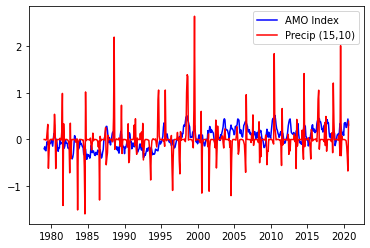

In [14]:
plt.plot(amo_float['time'],amo_float,'b')
plt.plot(pt_tp['time'],pt_tp,'r')
plt.legend(['AMO Index','Precip (15,10)'])

### Calculate Pearson's correlation

In [15]:
R=np.corrcoef(amo_float,pt_tp)
R

array([[1.        , 0.13934419],
       [0.13934419, 1.        ]])

In [16]:
corr=R[0,1]
corr 

0.13934419008886334

## Correlation over the entire domain

In [17]:
r_map_precip=xr.corr(amo_float,tp_norm,dim='time')
r_map_tcwv = xr.corr(amo_float,tcwv_norm,dim='time')
r_map_clouds = xr.corr(amo_float,clouds_norm, dim='time')
all_corr_maps = ([r_map_clouds,r_map_precip,r_map_tcwv])
print(all_corr_maps)

[<xarray.DataArray (latitude: 401, longitude: 241)>
dask.array<truediv, shape=(401, 241), dtype=float64, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0, <xarray.DataArray (latitude: 401, longitude: 241)>
dask.array<truediv, shape=(401, 241), dtype=float64, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0, <xarray.DataArray (latitude: 401, longitude: 241)>
dask.array<truediv, shape=(401, 241), dtype=float64, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0]


### Plot the correlation map

Text(0.5, 0.98, 'Correlation between AMO Index and Precipitation Anomalies over Africa')

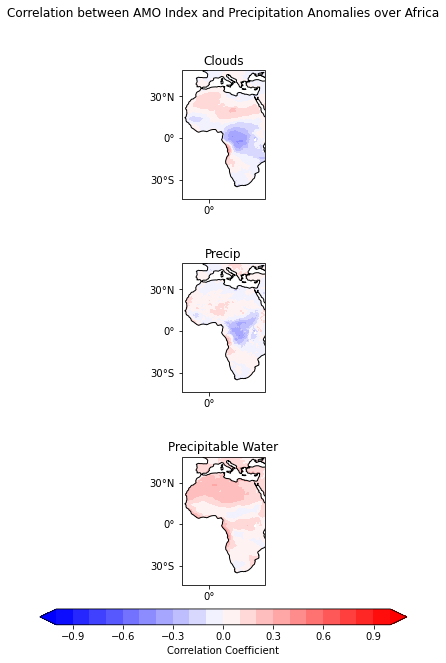

In [18]:
labels=['Clouds','Precip', 'Precipitable Water']
clevs=np.arange(-1,1.1,0.1)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the variables and plot
for i, corr in enumerate(all_corr_maps):

        # Select the variable
        data=all_corr_maps[i]

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=all_corr_maps[i]['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,all_corr_maps[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='bwr',extend='both')

       # Longitude and latitude labels
        xyticks(axs[i],lons,all_corr_maps[i]['latitude'])
        #Set extent for the plots
        axs[i].set_extent([-20,40,-40,45])
        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',shrink=0.7, label='Correlation Coefficient')

# Add a big title at the top
plt.suptitle('Correlation between AMO Index and Precipitation Anomalies over Africa')

### Statistical Significance of a Correlation

In [19]:
from scipy.stats import pearsonr


In [21]:
nx=len(tp_norm['longitude'])
ny=len(tp_norm['latitude'])
#print(amo_float)
#tp_norm_nonans= tp_norm.dropna(dim='time')

p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        r,p=pearsonr(amo_float,tp_norm[:,j,i])
        r_array[j,i]=r
        p_array[j,i]=p
r_array.shape
# Array contains Nans, so it is throwing an error? Or does this mean there is no statistical significance?

ValueError: array must not contain infs or NaNs

In [ ]:
plt.contourf(r_array)

In [ ]:
plt.contourf(p_array)
plt.colorbar()


### Now, plot the correlation including significance

In [ ]:
mask_sig=np.where(p_array<0.05,r_array,np.nan)

In [ ]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))
# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
# Add cyclic point
data=r_array
data,lon=add_cyclic_point(data,coord=ds_anoms['lon'])
mask_data,lons=add_cyclic_point(mask_sig,coord=ds_anoms['lon'])
# Make a filled contour plot
cs=ax.contourf(lon,ds_anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')
ax.contourf(lon,ds_anoms['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)
# Add coastlines
ax.coastlines()
# Add gridlines
ax.gridlines()
#Function to define x,yticks for lat and lon points
xyticks(ax,lon,ds_anoms['lat'])
# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')
# Add title
plt.title('Correlation between de-trended AMO Index and Precipitation Anomalies over Africa')